In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
import datetime
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
def normalize(df):
    df2 = df.copy()
    for col in df2.columns:
        if col != 'zip_code' and col!= 'month' and col!= 'year' and col!='date':
            #if isinstance(df2[col].iloc[0], (int, float)):
            mean = np.mean(df2[col])
            std = np.std(df2[col])
            df2[col] = (df2[col]-mean)/std
    return df2



def remove_null(df):
    for col in df.columns:
        df = df[pd.notnull(df[col])]
    return df

def remove_null1(df):
    for col in df.columns:
        print(df[pd.notnull(df[col])])
    return df


def corrMat(corr,label,annotation = False):

    ax = plt.axes()
    #plt.ax(figsize=(300,300))
    
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax = ax,
            annot=annotation)
    ax.set_title(label)
    #plt.set_title(label)
    
    plt.savefig(label)
    plt.show()
    



def corr_by_zip(df1,df2,mutual_zip ,tol = 0.5,print_all = False):
    
    #NOTE: ALL ZIP IN DF NEEDS TO BE STRING
    df1['zip_code'] = df1['zip_code'].astype('str')
    df2['zip_code'] = df2['zip_code'].astype('str')
    df1['date'] = df1['date'].astype('str')
    df2['date'] = df2['date'].astype('str')
    i = 0
    for zc in mutual_zip:
        i+=1
        if i%10 == 0:
            print(i)
        df1_sub = df1.loc[df1['zip_code']==zc]
        df2_sub = df2.loc[df2['zip_code']==zc]

        df1_sub.drop(['zip_code'],axis = 1, inplace = True)
        df2_sub.drop(['zip_code'],axis = 1, inplace = True)

        for col1 in df1_sub.columns:
            for col2 in df2_sub.columns:
                
                if col1!='date' and col2 != 'date':
                    new = df1_sub[['date',col1]].merge(df2_sub[['date',col2]],'inner','date')
                    new.drop('date',axis = 1, inplace = True)
                    
                else:
                    continue
                corr1 = np.corrcoef(np.array(new.iloc[:,0]),np.array(new.iloc[:,1]))[0][1]
                if print_all:
                    print (zc, col1, col2, corr1)
                else:
                    if np.abs(corr1) >tol:
                        print (zc,col1, col2, corr1)
                        

                        
def corr_by_year(df1,df2,mutual_year ,tol = 0.5,print_all = False):
    
    #NOTE: ALL ZIP IN DF NEEDS TO BE STRING
    df1['zip_code'] = df1['zip_code'].astype('str')
    df2['zip_code'] = df2['zip_code'].astype('str')
    df1['year'] = df1['year'].astype('str')
    df2['year'] = df2['year'].astype('str')
    i = 0
    for zc in np.array(mutual_year).astype(str):
        i+=1
        if i%10 == 0:
            print(i)
        df1_sub = df1.loc[df1['year']==zc]
        df2_sub = df2.loc[df2['year']==zc]

        df1_sub.drop(['year'],axis = 1, inplace = True)
        df2_sub.drop(['year'],axis = 1, inplace = True)

        for col1 in df1_sub.columns:
            for col2 in df2_sub.columns:
                
                if col1!='zip_code' and col2 != 'zip_code':
                    new = df1_sub[['zip_code',col1]].merge(df2_sub[['zip_code',col2]],'inner','zip_code')
                    zipc = new['zip_code']
                    new.drop('zip_code',axis = 1, inplace = True)
                    
                else:
                    continue
                corr1 = np.corrcoef(np.array(new.iloc[:,0]),np.array(new.iloc[:,1]))[0][1]
                if print_all:
                    print (zc, col1, col2, corr1)
                else:
                    if np.abs(corr1) > tol:
                        print (zc, col1, col2, corr1)
                        
def corr_by_month(df1,df2,mutual_month ,tol = 0.5,print_all = False):
    
    #NOTE: ALL ZIP IN DF NEEDS TO BE STRING
    df1['zip_code'] = df1['zip_code'].astype('str')
    df2['zip_code'] = df2['zip_code'].astype('str')
    df1['month'] = df1['month'].astype('str')
    df2['month'] = df2['month'].astype('str')
    i = 0
    for zc in np.array(mutual_month).astype(str):
        i+=1
        if i%10 == 0:
            print(i)
        df1_sub = df1.loc[df1['month']==zc]
        df2_sub = df2.loc[df2['month']==zc]

        df1_sub.drop(['month'],axis = 1, inplace = True)
        df2_sub.drop(['month'],axis = 1, inplace = True)

        for col1 in df1_sub.columns:
            for col2 in df2_sub.columns:
                
                if col1!='zip_code' and col2 != 'zip_code':
                    new = df1_sub[['zip_code',col1]].merge(df2_sub[['zip_code',col2]],'inner','zip_code')
                    zipc = new['zip_code']
                    new.drop('zip_code',axis = 1, inplace = True)
                    
                else:
                    continue
                corr1 = np.corrcoef(np.array(new.iloc[:,0]),np.array(new.iloc[:,1]))[0][1]
                if print_all:
                    print (zc, col1, col2, corr1)
                else:
                    if np.abs(corr1) > tol:
                        print (zc, col1, col2, corr1)
  

 



In [3]:
cw_311 = pd.read_csv('cw_311.csv')
cw_311['SDW'] = np.nan_to_num(cw_311['SDW'])
cw_311['snow_depth'] = np.nan_to_num(cw_311['snow_depth'])
cw_311['snow_accumulation'] = np.nan_to_num(cw_311['snow_accumulation'])
cw_311 = remove_null(cw_311)
cw_311.drop('month_of_year',axis = 1, inplace = True)
cw_311.drop('month',axis = 1, inplace = True)
cw_311['zip_code'] = cw_311['zip_code'].astype(str)

In [21]:
bike_weather = pd.read_csv('bike_weather_day2.csv')
bike_weather['SDW'] = np.nan_to_num(bike_weather['SDW'])
bike_weather['snow_depth'] = np.nan_to_num(bike_weather['snow_depth'])
bike_weather['snow_accumulation'] = np.nan_to_num(bike_weather['snow_accumulation'])
bike_weather = remove_null(bike_weather)
bike_weather.drop('month_of_year',axis = 1, inplace = True)
bike_weather.drop('month',axis = 1, inplace = True)
bike_weather['zip_code'] = bike_weather['zip_code'].astype(int).astype(str)

In [5]:
taxi_weather = pd.read_csv("taxi_wea.csv")
taxi_weather = taxi_weather[taxi_weather.date != 'date']
taxi_weather['SDW'] = np.nan_to_num(taxi_weather['SDW'].astype(float))
taxi_weather['snow_depth'] = np.nan_to_num(taxi_weather['snow_depth'].astype(float))
taxi_weather['snow_accumulation'] = np.nan_to_num(taxi_weather['snow_accumulation'].astype(float))
taxi_weather = remove_null(taxi_weather)
taxi_weather.drop('month_of_year',axis = 1, inplace = True)
taxi_weather.drop('month',axis = 1, inplace = True)
taxi_weather['zip_code'] = taxi_weather['zip_code'].astype(str)

In [283]:
taxi_weather.head()

,date,zip_code,taxi_avg_trip_distance,taxi_total_trip_distance,taxi_avg_amount,taxi_total_amount,wind_speed,visb,temp,prcp,snow_depth,SDW,snow_accumulation
0,2012-03-03,11210,2.61,41.76,11.345,181.52,5.502040816326527,9025.795918367347,8.628571428571432,0.5850000000000002,0.0,0.0,0.0
1,2012-12-31,11430,15.130245848044986,115700.99,51.18546881129852,391415.2799999998,7.409374999999995,16069.75,0.3187499999999999,0.0,0.0,0.0,0.0
2,2012-08-07,11430,14.67568630011755,112371.73000000007,43.6739819772757,334411.68000000005,2.9093749999999994,16069.75,24.221875000000008,0.23199999999999998,0.0,0.0,0.0
3,2012-10-31,11430,14.705631262525056,73381.10000000003,49.505012024048106,247030.01000000004,4.988235294117645,16071.117647058823,9.241176470588236,0.08275862068965517,0.0,0.0,0.0
4,2012-08-06,11430,14.985467587672694,141013.25000000006,45.221941551540894,425538.4699999998,5.758974358974355,14630.923076923076,26.230769230769226,1.1294117647058826,0.0,0.0,0.0


In [6]:
taxi = taxi_weather[['date', 'zip_code', 'taxi_avg_trip_distance',
       'taxi_total_trip_distance', 'taxi_avg_amount', 'taxi_total_amount']]
weather3 = taxi_weather[['date', 'zip_code','wind_speed', 'visb', 'temp', 'prcp', 'snow_depth', 'SDW',
       'snow_accumulation']]
#taxi_weather_n = normalize(cw_311)
#weather_n = normalize(weather3)
#taxi_n = normalize(taxi)

In [7]:
weather = cw_311[['date', 'zip_code', 'wind_speed', 'visb', 'temp', 'prcp', 'snow_depth',
       'SDW', 'snow_accumulation']]
collision_311 = cw_311[['date', 'zip_code','number_persons_injured',
       'number_persons_killed', 'number_pedestrians_injured',
       'number_pedestrians_killed', 'number_cyclist_injured',
       'number_cyclist_killed', 'number_motorist_injured',
       'number_motorist_killed', 'complaint_count']]
cw_311n = normalize(cw_311)
weather_n = normalize(weather)
collision_311_n = normalize(collision_311)

In [22]:
weather2 = bike_weather[['date', 'zip_code', 'wind_speed', 'visb',
       'temp', 'prcp', 'snow_depth', 'SDW', 'snow_accumulation']]
bike = bike_weather[['date', 'zip_code', 'citi_avg_trip_duration',
       'citi_total_trip_duration', 'total_trip_count']]
bike_weather_n = normalize(bike_weather)
weather2_n = normalize(weather2)
bike_n = normalize(bike)

In [9]:
mutzip1 = set(list(weather['zip_code'].astype(str))) & set(list(collision_311['zip_code'].astype(str)))
corr_by_zip(weather_n,collision_311_n,mutzip1 ,tol = 0.5,print_all = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


10
20
30
40
50
60
10000 wind_speed number_persons_injured -1.0
10000 wind_speed number_persons_killed 1.0
10000 wind_speed number_motorist_injured -1.0
10000 wind_speed number_motorist_killed 1.0
10000 visb number_persons_injured 1.0
10000 visb number_persons_killed -1.0
10000 visb number_motorist_injured 1.0
10000 visb number_motorist_killed -1.0
10000 temp number_persons_injured 1.0
10000 temp number_persons_killed -1.0
10000 temp number_motorist_injured 1.0
10000 temp number_motorist_killed -1.0
10000 prcp number_persons_injured 1.0
10000 prcp number_persons_killed -1.0
10000 prcp number_motorist_injured 1.0
10000 prcp number_motorist_killed -1.0
10000 snow_depth number_persons_injured -1.0
10000 snow_depth number_persons_killed 1.0
10000 snow_depth number_motorist_injured -1.0
10000 snow_depth number_motorist_killed 1.0
10458 temp complaint_count -0.519903269536
70
11040 prcp number_pedestrians_injured 0.513877346205
80
90
100
11005 wind_speed number_persons_injured -0.552584328165

zip code 10000 has only two observations, so needs to be discarded 

11040 has 96 observations, but not siginificant 

10069 not significant

11005 not significant

In [10]:
#temp, complaint
cw311_10458 = cw_311[cw_311['zip_code'] == '10458']
cw311_10458 = normalize(cw311_10458)

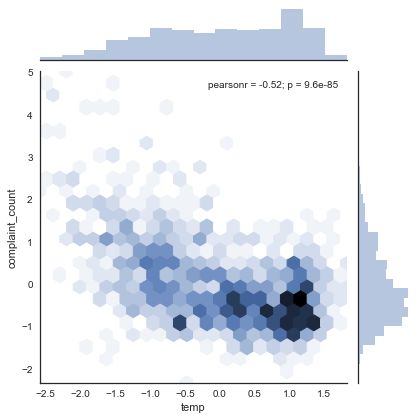

In [35]:
plt.figure(figsize=(25,20))
with sns.axes_style('white'):
    g = sns.jointplot("temp", "complaint_count", cw311_10458, kind='hex')
    g.ax_joint.plot()
plt.savefig('temp_complaint',dpi = 500)   

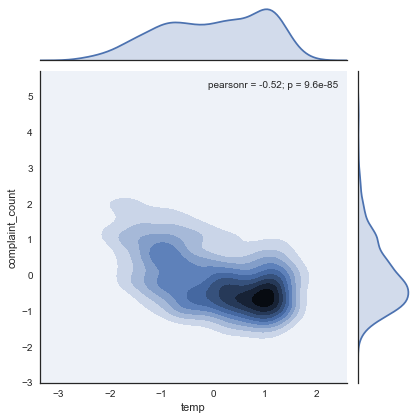

In [13]:
plt.figure(figsize=(15,10))
with sns.axes_style('white'):
    sns.jointplot("temp", "complaint_count", cw311_10458, kind='kde')
plt.savefig('temp_complaint_2')   

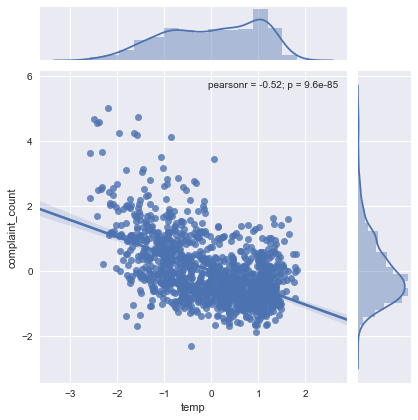

In [14]:

plt.figure(figsize=(15,10))#sns.lmplot('temp', 'complaint_count',cw311_10458)
sns.jointplot('temp', 'complaint_count', data=cw311_10458, kind="reg")
plt.savefig('temp_complaint_scat')

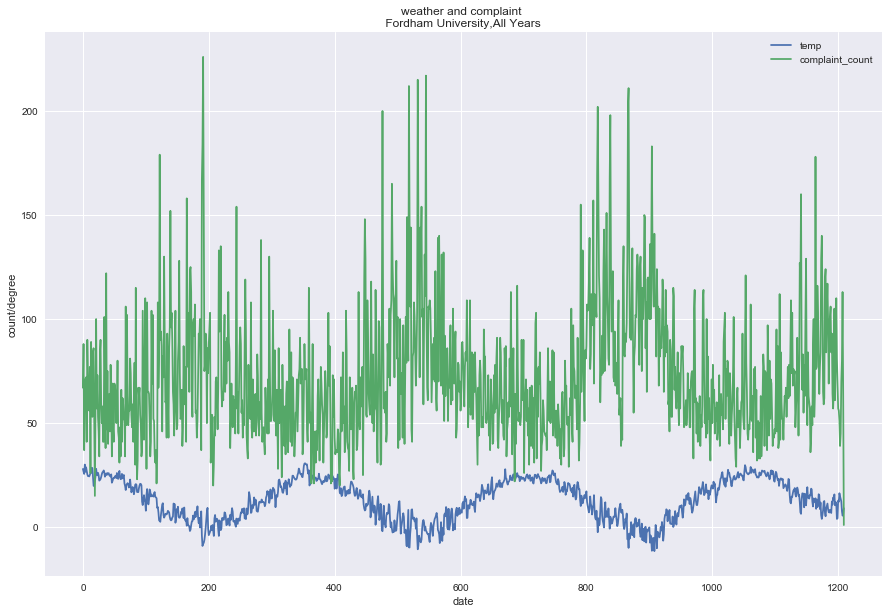

In [30]:
cw311_10458_notNorm = cw_311[cw_311['zip_code'] == '10458']
cw311_10458_notNorm_sorted =cw311_10458_notNorm.sort_values(by = 'date')

plt.figure(figsize=(15,10))
x = np.arange(len(cw311_10458_notNorm_sorted.date))
y = cw311_10458_notNorm_sorted [['temp','complaint_count']]
plt.plot(x, y)
plt.title('weather and complaint \n Fordham University,All Years ')
plt.xlabel('date')
#plt.xticks(x,cw311_10458_notNorm_sorted.date.values)
plt.ylabel('count/degree')
plt.legend(y)
plt.savefig('weather_complaint_line')
plt.show()


In [18]:
#temp, complaint
cw311_10069 = cw_311[cw_311['zip_code'] == '10069']
cw311_10069 = normalize(cw311_10069)

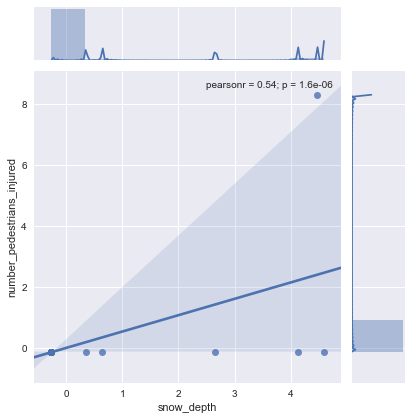

In [19]:

sns.jointplot("snow_depth", "number_pedestrians_injured", cw311_10069, kind = "reg")
plt.savefig('weakness1')
#not significant

In [78]:
#wind_speed number_persons_injured
cw311_11005 = cw_311[cw_311['zip_code'] == '11005']
cw311_11005 = normalize(cw311_11005)

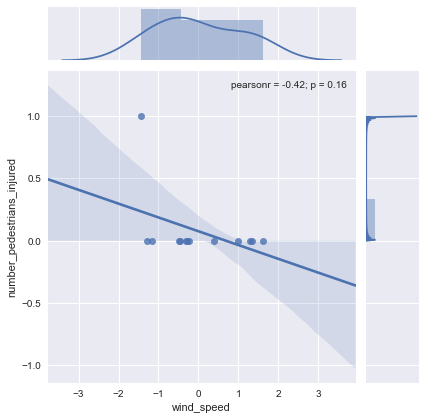

In [79]:
sns.jointplot("wind_speed", "number_pedestrians_injured", cw311_11005, kind = "reg")

In [23]:
mutzip2 = bike_weather.zip_code.unique()
corr_by_zip(weather2_n,bike_n,mutzip2 ,tol = 0.7,print_all = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


10002 temp total_trip_count 0.735326603071
10014 temp citi_total_trip_duration 0.711662177496
10014 temp total_trip_count 0.768291014142
10
10019 temp citi_total_trip_duration 0.70875264218
20
10028 temp total_trip_count 0.72049012981
30
10069 temp total_trip_count 0.754387844335
10038 temp total_trip_count 0.76620304854
10013 temp citi_total_trip_duration 0.74320547777
10013 temp total_trip_count 0.780953441321
40
10281 temp total_trip_count 0.70092522436
10004 temp total_trip_count 0.751674591031
10012 temp total_trip_count 0.725908659318
10007 temp total_trip_count 0.733455595933
10011 temp total_trip_count 0.710161940481
10282 temp total_trip_count 0.784721927466
10280 temp total_trip_count 0.768095745597
50
60


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


11237 wind_speed citi_avg_trip_duration -1.0
11237 wind_speed citi_total_trip_duration -1.0
11237 wind_speed total_trip_count 1.0
11237 visb citi_avg_trip_duration 1.0
11237 visb citi_total_trip_duration 1.0
11237 visb total_trip_count -1.0
11237 temp citi_avg_trip_duration -1.0
11237 temp citi_total_trip_duration -1.0
11237 temp total_trip_count 1.0


In [32]:
zip_tempTripCount_manh = ['10013','10028','10280','10282',
                     '10007','10069','10028',
                     '10014','10038','10004',
                     '10025','10024','10013']
temp_tripCount_manh = bike_weather[bike_weather['zip_code'].isin(zip_tempTripCount_manh)]

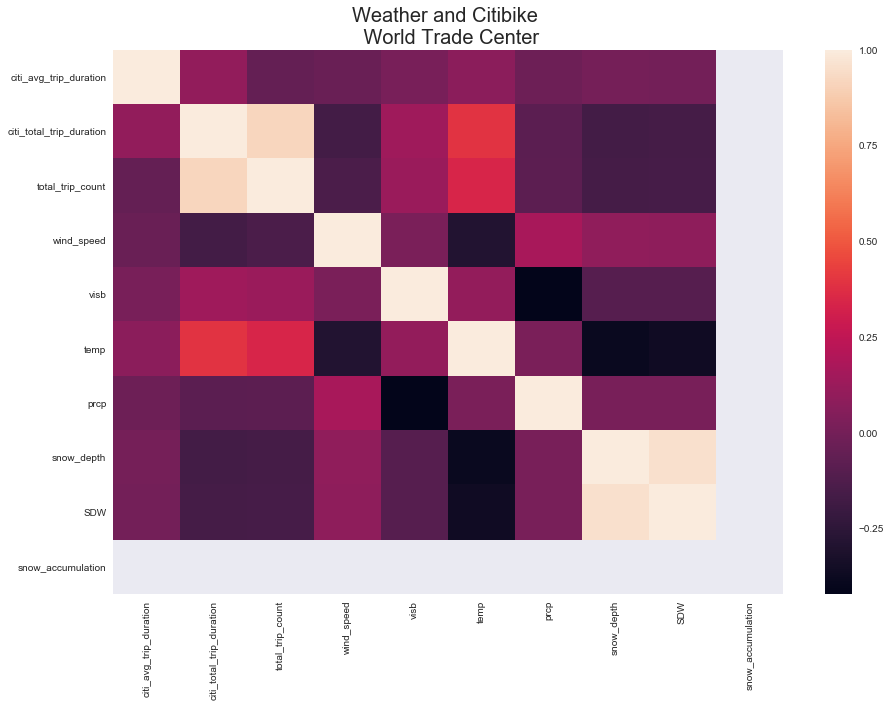

In [34]:
plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(temp_tripCount_manh).corr(),fmt='5g')
plt.title('Weather and Citibike \n World Trade Center',size = 20)
plt.savefig('Weather and Citibike by day wtc')
#corrMat(normalize(temp_tripCount_manh).corr(),'Weather and Citibike \n Selected Zip Codes in Manhattan')

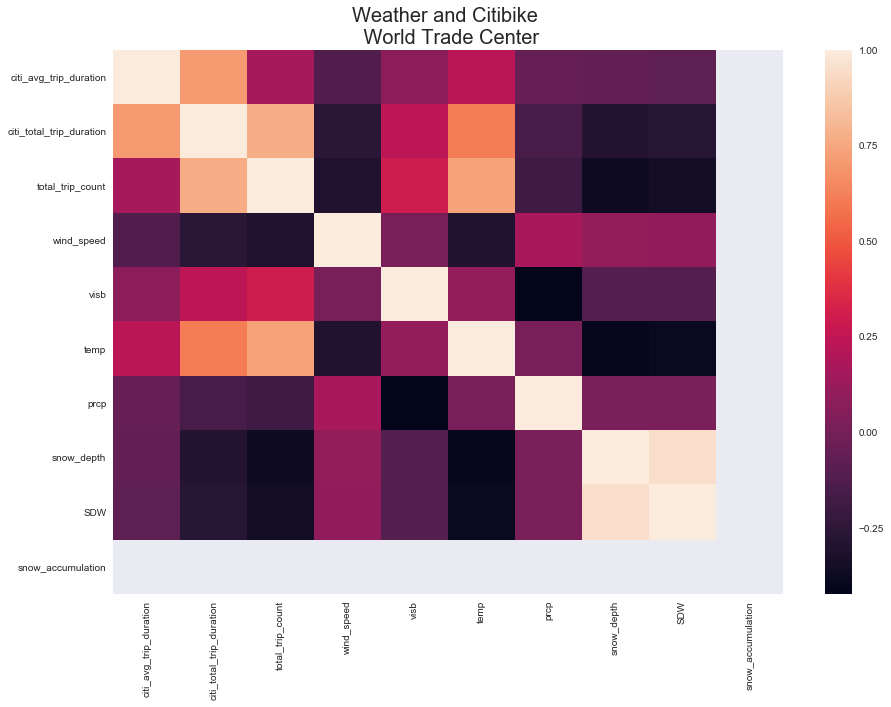

In [24]:
temp_tripCount_10007 = bike_weather[bike_weather['zip_code'] == '10007']
#corrMat(normalize(temp_tripCount_10007).corr(),'Weather and Citibike \n World Trade Center')
plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(temp_tripCount_10007).corr(),fmt='5g')
plt.title('Weather and Citibike \n World Trade Center',size = 20)
plt.savefig('Weather and Citibike by day wtc')

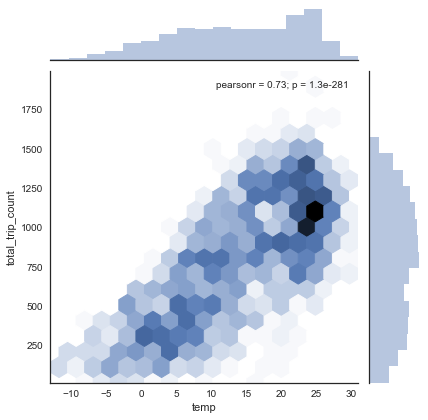

In [25]:
plt.figure(figsize=(15,10))
with sns.axes_style('white'):
    g = sns.jointplot("temp", "total_trip_count", temp_tripCount_10007, kind='hex')
    #g.title('Citibike Trip Count and Temperature')
    
    g.ax_joint.plot()
#plt.title('Temperature and Citibike Total Trip Count')
plt.savefig('temp_tripCount_scat', dpi=1000)

In [26]:
temp_tripCount_10007_sorted

NameError: name 'temp_tripCount_10007_sorted' is not defined

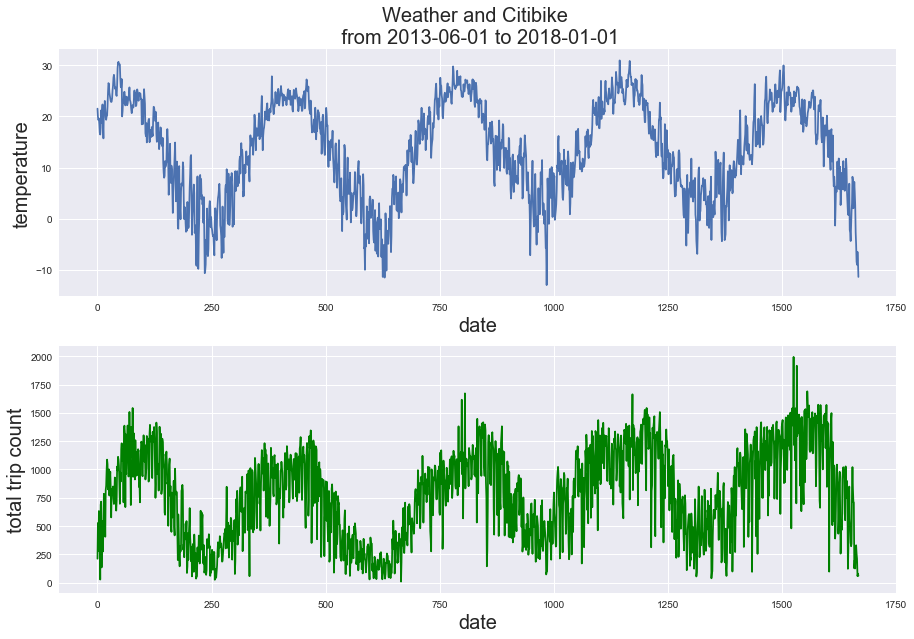

In [27]:
temp_tripCount_10007_sorted = temp_tripCount_10007.sort_values(by = 'date')
#temp_tripCount_10007_sorted = normalize(temp_tripCount_10007_sorted)
x = np.arange(len(temp_tripCount_10007_sorted.date))
y = temp_tripCount_10007_sorted [['temp']]
'''
plt.plot(x, y)
plt.title('Weather and Citibike \n from 2013-06-01 to 2018-01-01')
plt.xlabel('date')
plt.ylabel('temperature')
#plt.legend(y)
plt.show()
'''
y2 = temp_tripCount_10007_sorted [['total_trip_count']]
'''
plt.plot(x, y2)
plt.title('Weather and Citibike \n from 2013-06-01 to 2018-01-01')
plt.xlabel('date')
plt.ylabel('total trip count')

plt.show()
'''
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,1,1)
ax1.plot(x, y)
plt.title('Weather and Citibike \n from 2013-06-01 to 2018-01-01',size = 20)
plt.xlabel('date',size = 20)
plt.ylabel('temperature',size = 20)

ax2=fig.add_subplot(2,1,2)
plt.plot(x, y2,'green')
plt.xlabel('date',size = 20)
plt.ylabel('total trip count',size = 20)
plt.savefig('temp_tripCount',dpi=1000)

plt.show()

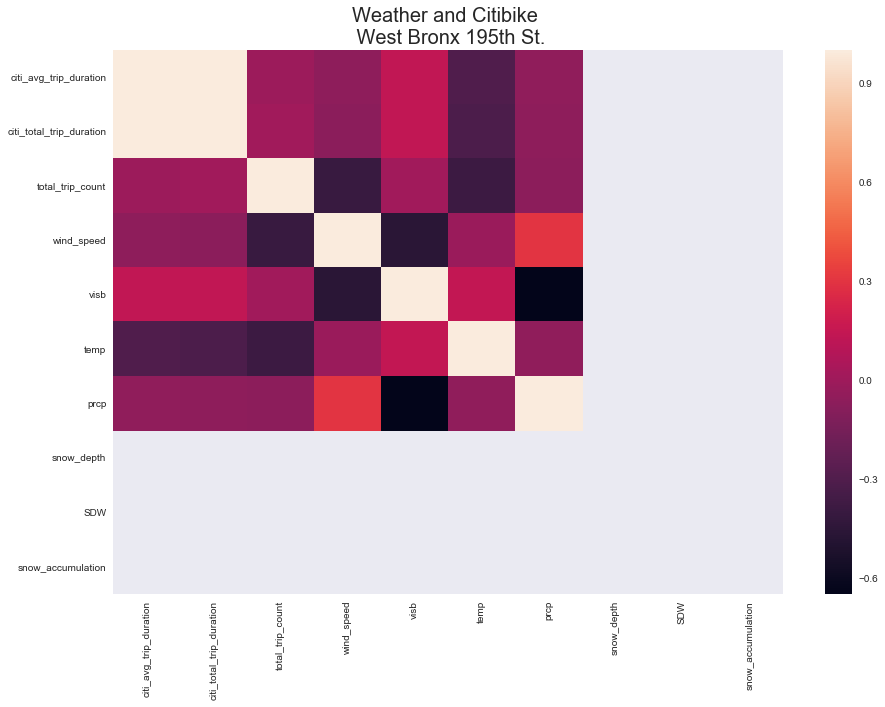

In [28]:
visb_tripCount_10468 = bike_weather[bike_weather['zip_code'] == '10468']
#corrMat(normalize(temp_tripCount_10007).corr(),'Weather and Citibike \n World Trade Center')
plt.figure(figsize = ((15,10)))
sns.heatmap(normalize(visb_tripCount_10468).corr(),fmt='5g')
plt.title('Weather and Citibike \n West Bronx 195th St.',size = 20)
plt.savefig('Weather and Citibike by day bronx')

In [ ]:
mutzip3 = taxi_weather.zip_code.unique()
corr_by_zip(normalize(weather3),normalize(bike_n),mutzip2 ,tol = 0.7,print_all = False)